In [2]:
from modsim import *
import numpy as np

In [13]:
omega = 300 # rad/s
Rmin = 0.02 # m
Rmax = 0.055 # m
L = 47 # m
Ravg = (Rmax + Rmin)/2
Cavg = 2 * np.pi * Ravg
revs = L / Cavg
theta = 2 * np.pi * revs
k_est = (Rmax - Rmin) / theta
omega, Rmin, Rmax, L, Ravg, Cavg, revs, theta, k_est

(300,
 0.02,
 0.055,
 47,
 0.0375,
 0.23561944901923448,
 199.47419534184218,
 1253.3333333333335,
 2.7925531914893616e-05)

In [15]:
params = Params(
    omega=omega,
    Rmin=Rmin,
    Rmax=Rmax,
    L=L,
    k_est=k_est
)
init = State(theta=0, y=0, r=Rmin)
system = System(init=init, params=params, t_end=10)
system

namespace(init=theta    0.00
               y        0.00
               r        0.02
               Name: state, dtype: float64,
          params=namespace(omega=300,
                           Rmin=0.02,
                           Rmax=0.055,
                           L=47,
                           k_est=2.7925531914893616e-05),
          t_end=10)

$$ \frac{d \theta}{dt} = \omega$$

$$
\frac{dy}{dt} = r \frac{d \theta}{dt} = r \omega
$$

$$
\frac{dr}{dt} = k \frac{d \theta}{dt} = k \omega
$$

In [16]:
def slope_func(t, state, system):
    theta, y, r = state
    omega = system.params.omega
    dydt = r * omega
    drdt = system.params.k_est * omega
    return omega, dydt, drdt

In [17]:
slope_func(0, system.init, system)

(300, 6.0, 0.008377659574468085)

In [18]:
def event_func(t, state, system):
    theta, y, r = state
    return system.params.L - y

In [19]:
event_func(0, system.init, system)

47.0

In [20]:
results, details = run_solve_ivp(system, slope_func, events=event_func)
details.message

'A termination event occurred.'

In [21]:
results.tail()

,theta,y,r
4.010667,1203.200000,44.277760,0.05360
4.052444,1215.733333,44.951740,0.05395
4.094222,1228.266667,45.630107,0.05430
4.136000,1240.800000,46.312860,0.05465
4.177778,1253.333333,47.000000,0.05500


In [22]:
final_state = results.iloc[-1]
final_state

theta    1253.333333
y          47.000000
r           0.055000
Name: 4.177777777777779, dtype: float64

In [23]:
rotations = final_state.theta / 2 / np.pi
rotations

np.float64(199.47419534184218)

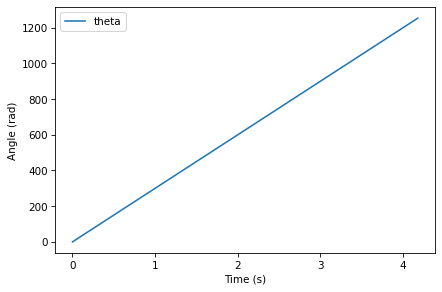

In [24]:
def plot_theta(results):
    results.theta.plot(label='theta')
    decorate(xlabel='Time (s)',
             ylabel='Angle (rad)')
plot_theta(results)

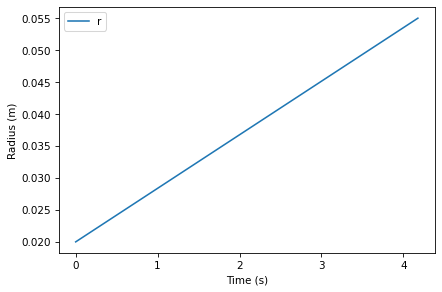

In [25]:
def plot_r(results):
    results.r.plot(label='r')
    decorate(xlabel='Time (s)',
             ylabel='Radius (m)')
plot_r(results)

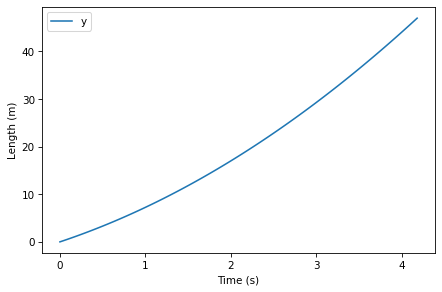

In [26]:
def plot_y(results):
    results.y.plot(label='y')
    decorate(xlabel='Time (s)',
             ylabel='Length (m)')
plot_y(results)

In [27]:
k = (Rmax ** 2 - Rmin ** 2) / 2 / L
k

2.7925531914893616e-05

In [28]:
# Exercise 24.1
dydt = gradient(results.y)

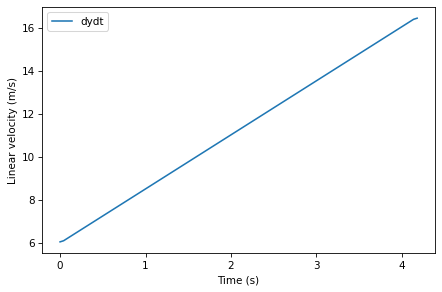

In [29]:
dydt.plot(label='dydt')
decorate(xlabel='Time (s)',ylabel='Linear velocity (m/s)')

In [30]:
max_linear_velocity = dydt.max()
max_linear_velocity

np.float64(16.447499999999934)


$$
\frac{dy}{dt} = r \frac{d \theta}{dt} = V_{max}
$$

$$
\frac{dr}{dt} = k \frac{d \theta}{dt}
$$

In [31]:
# mlv = max_linear_velocity
def slope_func_mlv(t, state, system):
    theta, y, r = state
    omega = max_linear_velocity / r
    drdt = system.params.k_est * omega
    return omega, max_linear_velocity, drdt

In [32]:
results_mlv, details_mlv = run_solve_ivp(system, slope_func_mlv, events=event_func)
details_mlv.message

'A termination event occurred.'

In [33]:
t_relv = results_mlv.index[-1]
t_relv

np.float64(2.8575771393828964)

In [34]:
results_mlv.tail()

,theta,y,r
2.743274,1218.554529,45.12,0.054029
2.771850,1227.234916,45.59,0.054271
2.800426,1235.879005,46.06,0.054513
2.829001,1244.487208,46.53,0.054753
2.857577,1253.059832,47.00,0.054992


In [39]:
# solution
print(f"The time to finish rolling the paper at the maximum linear velocity is {t_relv:.2f} seconds.")

The time to finish rolling the paper at the maximum linear velocity is 2.86 seconds.
